# Diseño del Codificador-Decodificador
Utilizando una Jupyter Notebook, implementar el codificador de la ecuación 1 propuesto en el paper de Vangelista y su correspondiente decodificador. El diseño debe permitir enviar una cantidad de bits múltiplo del Spreading Factor (SF). Estos bits tienen que ser aleatorios con una función de distribución de probabilidad uniforme. El script debe permitir imprimir una parte de los bits transmitidos y los bits decodificados. A la salida del decodificador se debe calcular e imprimir la probabilidad de error de bit (BER), entendiendose como la relación entre la cantidad de bits errados sobre la cantidad de bits enviados.

Utilizar una celda de la Jupyter Notebook para desarrollar la matematica y/o lógica utilizada en el algoritmo propuesto por ud.

Test: Si el codificador y decodificador se encuentran bien diseñados, bajo esta condición de funcionamiento debe dar un BER=0, cualquiera sea la cantidad de bits generados.

Nota: Para optimizar el rendimiento de las etapas a diseñar utilizar los recursos brindados por la biblioteca numpy, evitando utilizar listas.

![](https://github.com/dariocastillo11/TP---COMUNICAICONES-DIGITALES/blob/main/imagenes/fig1-7.png?raw=1)  ![](https://github.com/dariocastillo11/TP---COMUNICAICONES-DIGITALES/blob/main/imagenes/ec1vangelista.png?raw=1)


In [10]:
import numpy as np
# Parámetros
SF = 7  # Spreading Factor - ¿es 7 pero porque elegimos 7?
N_bits = SF * 10000   # Múltiplo de SF(Spreading Factor)da 7000, suficiente para estadística.

# Generación de bits aleatorios
bits_tx = np.random.randint(0, 2, N_bits)

#  Codificador
def codificador(bits, SF):  #RECIBE EL arreglo de bits, y el sf
    bits_reshape = bits.reshape(-1, SF)
    potencias = 2 ** np.arange(SF) #2^[0,1,2,3,4,,6,7] = [2^0,2^1,2^2,2^3,2^4,2^5,2^6] = [1,2,4,8,16,32,64]
    simbolos = np.dot(bits_reshape, potencias)#hace producto punto. calcula los simbolos.
    #multiplica el peso por el valor si es 0 o 1 . da un numero. obtengo una matriz de 1000 simbolos
    return simbolos

simbolos_tx = codificador(bits_tx, SF)

# Decodificador de bits
def decodificador(simbolos, SF):
    bits_rx = ((simbolos[:, None] & (1 << np.arange(SF))) > 0).astype(int)
    return bits_rx.reshape(-1)

bits_rx = decodificador(simbolos_tx,SF)
BER = np.mean(bits_tx != bits_rx)
print("BER:", BER)

BER: 0.0


# Diseño del Waveform Former - n-Tuple former
Agregar a la Jupyter Notebook utilizada anteriormente, la implementación del waveform Former propuesto en la ecuación 2 del paper de Vangelista y su correspondiente n-Tuple Former descripto en la sección III. Con el agregado de esta etapa el diseño debe permitir enviar una cantidad de bits múltiplo del Spreading Factor (SF). El script debe permitir imprimir una parte de los símbolos transmitidos y los símbolos decodificados. A la salida del n-Tuple former se debe calcular e imprimir la probabilidad de error de símbolo (SER), entendiéndose como la relación entre la cantidad de símbolos errados sobre la cantidad de símbolos enviados.

Utilizar una celda de la Jupyter Notebook para desarrollar la matematica y/o lógica utilizada en el algoritmo propuesto por ud.

Test: Si el Waveform Former y el n-Tuple Former se encuentran bien diseñados, bajo esta condición de funcionamiento debe dar un SER=0, cualquiera sea la cantidad de bits generados.

Nota: Para optimizar el rendimiento de las etapas a diseñar utilizar los recursos brindados por la biblioteca numpy, evitando utilizar listas.
![](https://github.com/dariocastillo11/TP---COMUNICAICONES-DIGITALES/blob/main/imagenes/fig1-7consigna2.png?raw=1) ![](https://github.com/dariocastillo11/TP---COMUNICAICONES-DIGITALES/blob/main/imagenes/ec1vangelista.png?raw=1)

| ![](https://github.com/dariocastillo11/TP---COMUNICAICONES-DIGITALES/blob/main/imagenes/seccion3-1.png?raw=1) | ![](https://github.com/dariocastillo11/TP---COMUNICAICONES-DIGITALES/blob/main/imagenes/seccion3-2.png?raw=1) |
|-----------------------------|-----------------------------|
| ![](https://github.com/dariocastillo11/TP---COMUNICAICONES-DIGITALES/blob/main/imagenes/seccion3-3.png?raw=1) | ![](https://github.com/dariocastillo11/TP---COMUNICAICONES-DIGITALES/blob/main/imagenes/seccion3-4.png?raw=1) |


In [11]:
# Formación de la onda
def waveform_former(simbolos, SF, B=1, T=1):
    N = 2 ** SF#numero de muestras
    n_symbols = len(simbolos)#cantidad de simbolos
    chirps = np.zeros((n_symbols, N), dtype=complex)#creaa un arreglo llena de ceros de tipo compleja
    k = np.arange(N)#vector indice de muestras

    #Aca aplica la formula de formulacion de simbolos como funcion de siglos
    for i, s in enumerate(simbolos):
        phase = 2 * np.pi * (((s + k) % N) * k * T * B / N)
        chirps[i, :] = (1 / np.sqrt(N)) * np.exp(1j * phase)
    return chirps.reshape(-1)

tx_signal = waveform_former(simbolos_tx, SF)

# Potencia promedio de la señal
P_signal = np.mean(np.abs(tx_signal)**2)

#  n-Tuple Former
def n_tuple_former(rx_signal, SF, B=1, T=1):
    N = 2 ** SF
    n_symbols = len(rx_signal) // N
    rx_signal = rx_signal[:n_symbols * N].reshape((n_symbols, N))
    k = np.arange(N)
    chirp_bank = np.zeros((N, N), dtype=complex)
    for s in range(N):
        phase = 2 * np.pi * (((s + k) % N) * k * T * B / N)
        chirp_bank[s, :] = (1 / np.sqrt(N)) * np.exp(1j * phase)
    simbolos_rx = np.zeros(n_symbols, dtype=int)
    for i in range(n_symbols):
        correlaciones = np.abs(np.dot(chirp_bank, rx_signal[i, :].conj()))
        simbolos_rx[i] = np.argmax(correlaciones)
    return simbolos_rx



# Decodificación de símbolos
simbolos_rx = n_tuple_former(tx_signal, SF)

# SER (Symbol Error Rate)
SER = np.mean(simbolos_tx != simbolos_rx)

# Mostrar parte de los símbolos transmitidos y decodificados
print("Símbolos transmitidos:", simbolos_tx[:16])
print("Símbolos decodificados:", simbolos_rx[:16])
print("SER:", SER)

Símbolos transmitidos: [ 10   1 110  10 106  44  38  92 115  47 123   8  32   2  49  44]
Símbolos decodificados: [ 10   1 110  10 106  44  38  92 115  47 123   8  32   2  49  44]
SER: 0.0


# Implementación del ruido del Canal
Incorporar en la Jupyter Notebook previamente utilizada la implementación del ruido AWGN (ruido aditivo blanco gaussiano) que introduce el canal de comunicaciones en la señal transmitida. Este ruido debe ser generado aleatoriamente con una distribución de probabilidad gaussiana de media cero y varianza σ2\sigma^2σ2, determinada a partir de la relación señal-ruido (SNR) expresada en decibeles (SNRdB_\text{dB}dB​) seleccionada. La notebook resultante debe ser capaz de reproducir la curva de BER correspondiente al escenario Flat FSCM, cuyos parámetros se detallan en la Sección IV del paper de referencia. Realizar también la curva de SER correspondiente.

![](https://github.com/dariocastillo11/TP---COMUNICAICONES-DIGITALES/blob/main/imagenes/uncodedBERcomparison.png?raw=1)

 Utilizar ademas una celda de la Jupyter Notebook para desarrollar la matematica, conceptualizar la teoría y/o lógica utilizada en el algoritmo propuesto por ud.

Nota: Para optimizar el rendimiento de las etapas a diseñar utilizar los recursos brindados por la biblioteca numpy, evitando utilizar listas.

In [ ]:
"""# CANAL
#### RUIDO BLANCO GAUSEANO
"""
# esta de ejemplo modificar:
def paso_por_el_canal(señal,varianza=1,ideal=False):
    if ideal:
        return señal
    ruido=np.random.normal(0,varianza,len(señal))
    return señal+ruido

# Implementación de un canal selectivo en frecuencia
Incorporar en la Jupyter Notebook previamente utilizada la implementación del canal selectivo en frecuencia h(nT ) = √0.8δ(nT ) + √0.2δ(nT - T )
propuesto por Vangelista en el paper de referencia. La notebook resultante debe ser capaz de reproducir la curva de BER correspondiente al escenario Freq Sel FSCM, cuyos parámetros se detallan en la Sección IV del paper de referencia. Realizar también la curva de SER correspondiente.



| ![](https://github.com/dariocastillo11/TP---COMUNICAICONES-DIGITALES/blob/main/imagenes/uncodedBERcomparison.png?raw=1)  | ![](https://github.com/dariocastillo11/TP---COMUNICAICONES-DIGITALES/blob/main/imagenes/seccion4-1.png?raw=1) |
|-----------------------------|-----------------------------|
|  | ![](https://github.com/dariocastillo11/TP---COMUNICAICONES-DIGITALES/blob/main/imagenes/seccion4-2.png?raw=1) |

Utilizar ademas una celda de la Jupyter Notebook para desarrollar la matematica, conceptualizar la teoría y/o lógica utilizada en el algoritmo propuesto por ud.

Nota: Para optimizar el rendimiento de las etapas a diseñar utilizar los recursos brindados por la biblioteca numpy, evitando utilizar listas.

SNR_dBs: [-12 -10  -8  -6  -4  -2   0]
BERs: [np.float64(0.09778571428571428), np.float64(0.017614285714285714), np.float64(0.0007), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
SERs: [np.float64(0.1967), np.float64(0.0361), np.float64(0.0016), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
BERs_sel: [np.float64(0.1639), np.float64(0.05567142857142857), np.float64(0.009842857142857143), np.float64(0.0017), np.float64(0.0003), np.float64(0.0), np.float64(0.0)]
SERs_sel: [np.float64(0.3462), np.float64(0.1303), np.float64(0.0287), np.float64(0.0059), np.float64(0.0007), np.float64(0.0), np.float64(0.0)]


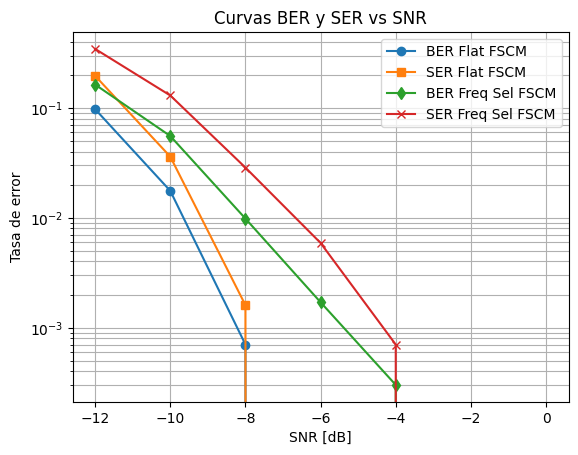

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# --- Canal plano (AWGN) ---
def paso_por_el_canal(señal, varianza=1, ideal=False):
    if ideal:
        return señal
    # Ruido complejo
    ruido = np.sqrt(varianza/2) * (np.random.randn(len(señal)) + 1j*np.random.randn(len(señal)))
    return señal + ruido

SNR_dBs = np.arange(-12, 1, 2)
BERs = []
SERs = []

for SNR_dB in SNR_dBs:
    sigma2 = P_signal / (10**(SNR_dB/10))  # Varianza del ruido
    rx_signal = paso_por_el_canal(tx_signal, varianza=sigma2)
    simbolos_rx = n_tuple_former(rx_signal, SF)
    bits_rx = decodificador(simbolos_rx, SF)
    BER = np.mean(bits_tx != bits_rx)
    SER = np.mean(simbolos_tx != simbolos_rx)
    BERs.append(BER)
    SERs.append(SER)

print("SNR_dBs:", SNR_dBs)
print("BERs:", BERs)
print("SERs:", SERs)

# --- Canal selectivo en frecuencia ---
BERs_sel = []
SERs_sel = []

for SNR_dB in SNR_dBs:
    h = np.array([np.sqrt(0.8), np.sqrt(0.2)])
    y_signal = np.convolve(tx_signal, h, mode='full')[:len(tx_signal)]
    sigma2 = P_signal / (10**(SNR_dB/10))
    ruido = np.sqrt(sigma2/2) * (np.random.randn(*y_signal.shape) + 1j*np.random.randn(*y_signal.shape))
    rx_signal = y_signal + ruido
    simbolos_rx = n_tuple_former(rx_signal, SF)
    bits_rx = decodificador(simbolos_rx, SF)
    BER = np.mean(bits_tx != bits_rx)
    SER = np.mean(simbolos_tx != simbolos_rx)
    BERs_sel.append(BER)
    SERs_sel.append(SER)

print("BERs_sel:", BERs_sel)
print("SERs_sel:", SERs_sel)

# --- Gráfica comparativa ---
plt.figure()
plt.semilogy(SNR_dBs, BERs, 'o-', label='BER Flat FSCM')
plt.semilogy(SNR_dBs, SERs, 's-', label='SER Flat FSCM')
plt.semilogy(SNR_dBs, BERs_sel, 'd-', label='BER Freq Sel FSCM')
plt.semilogy(SNR_dBs, SERs_sel, 'x-', label='SER Freq Sel FSCM')
plt.xlabel('SNR [dB]')
plt.ylabel('Tasa de error')
plt.title('Curvas BER y SER vs SNR')
plt.grid(True, which='both')
plt.legend()
plt.show()

# Implementación del sistema LoRa en el SDR
A partir del Paper de referencia [From Demodulation to Decoding: Toward Complete LoRa PHY Understanding and Implementation](https://dl.acm.org/doi/10.1145/3546869#d1c2855) implementar la transmisión de tramas LoRa en el transmisor

![](https://github.com/dariocastillo11/TP---COMUNICAICONES-DIGITALES/blob/main/imagenes/fig3.png?raw=1)

y las etapas de Dechirping, Window Alignment, Peak Merging y clock Recovery en el receptor

![](https://github.com/dariocastillo11/TP---COMUNICAICONES-DIGITALES/blob/main/imagenes/fig3d.png?raw=1)

Probar el sistema utilizando en los SDRs para el envío de mensajes cortos.

Utilizar ademas una celda de la Jupyter Notebook para desarrollar la matematica, conceptualizar la teoría y/o lógica utilizada en el algoritmo propuesto por ud.

Nota: Para optimizar el rendimiento de las etapas a diseñar utilizar los recursos brindados por la biblioteca numpy, evitando utilizar listas.

Símbolos transmitidos: [111  26 121  85  83 112  99  37]
Símbolos detectados:   [111  26 121  85  83 112  99  37]
SER: 0.0


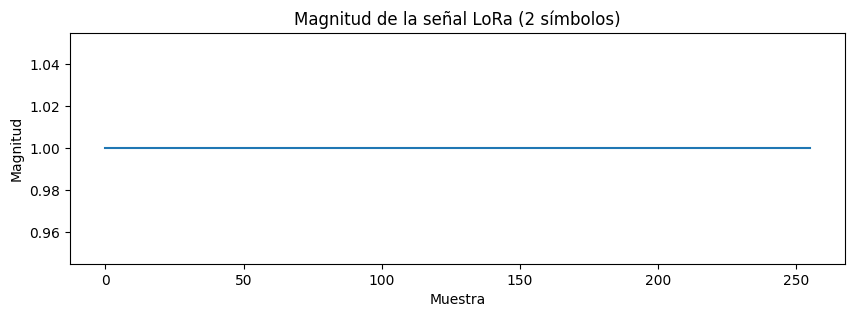

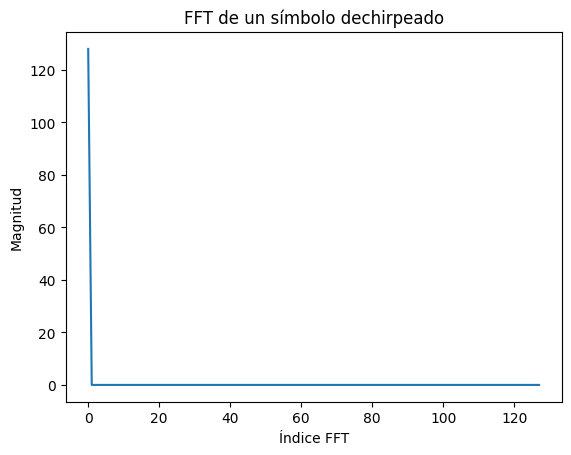

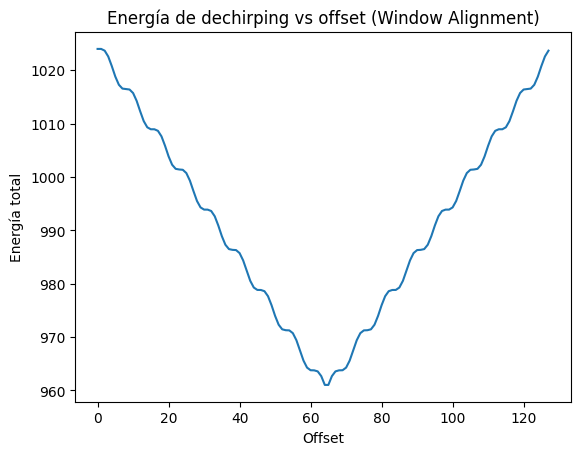

In [ ]:
import numpy as np

# Parámetros LoRa
SF = 7
N = 2 ** SF
n_symbols = 8
preamble_len = 8

# 1. Generación de símbolos aleatorios (datos)
data_symbols = np.random.randint(0, N, n_symbols)

# 2. Construcción de la trama (preambulo + datos)
frame = np.concatenate([np.zeros(preamble_len, dtype=int), data_symbols])

# 3. Modulación LoRa (Chirp Spread Spectrum)
def lora_modulate(symbols, SF):
    N = 2 ** SF
    k = np.arange(N)
    signal = []
    for s in symbols:
        phase = 2 * np.pi * ((s * k / N) + (k**2) / (2*N))
        chirp = np.exp(1j * phase)
        signal.append(chirp)
    return np.concatenate(signal)

tx_signal = lora_modulate(frame, SF)

# --- Canal (puedes agregar ruido aquí si quieres) ---
# rx_signal = tx_signal + ruido
rx_signal = tx_signal  # Ideal

# 4. Receptor LoRa con etapas extra

def window_alignment(rx_signal, SF, preamble_len):
    N = 2 ** SF
    search_range = N  # Buscar dentro de un símbolo
    max_energy = 0
    best_offset = 0
    k = np.arange(N)
    base_chirp = np.exp(1j * 2 * np.pi * (k**2) / (2*N))
    # Buscar la mejor alineación usando el preámbulo
    for offset in range(search_range):
        energies = []
        for i in range(preamble_len):
            idx = offset + i*N
            if idx+N > len(rx_signal):
                break
            r = rx_signal[idx:idx+N]
            dechirped = r * np.conj(base_chirp)
            spectrum = np.fft.fft(dechirped)
            energies.append(np.max(np.abs(spectrum)))
        total_energy = np.sum(energies)
        if total_energy > max_energy:
            max_energy = total_energy
            best_offset = offset
    return best_offset

def peak_merging(spectrum, threshold=0.5):
    # Si hay varios picos cercanos, fusionar (aquí solo devuelve el mayor)
    abs_spec = np.abs(spectrum)
    max_val = np.max(abs_spec)
    peaks = np.where(abs_spec > threshold * max_val)[0]
    # Si hay varios picos, devolver el promedio (mod N)
    if len(peaks) > 1:
        return int(np.round(np.mean(peaks))) % len(spectrum)
    else:
        return peaks[0]

def lora_demodulate(rx_signal, SF, preamble_len):
    N = 2 ** SF
    # --- Window Alignment ---
    offset = window_alignment(rx_signal, SF, preamble_len)
    rx_signal = rx_signal[offset:]
    n_symbols = len(rx_signal) // N
    rx_signal = rx_signal[:n_symbols * N].reshape((n_symbols, N))
    k = np.arange(N)
    base_chirp = np.exp(1j * 2 * np.pi * (k**2) / (2*N))
    symbols_rx = []
    for r in rx_signal:
        dechirped = r * np.conj(base_chirp)
        spectrum = np.fft.fft(dechirped)
        # --- Peak Merging ---
        symbol_hat = peak_merging(spectrum)
        symbols_rx.append(symbol_hat)
    # --- Clock Recovery ---
    # En simulación ideal, no es necesario. En SDR, aquí ajustarías el muestreo.
    return np.array(symbols_rx[preamble_len:])

symbols_rx = lora_demodulate(rx_signal, SF, preamble_len)

print("Símbolos transmitidos:", data_symbols)
print("Símbolos detectados:  ", symbols_rx)
print("SER:", np.mean(data_symbols != symbols_rx))

import matplotlib.pyplot as plt
# Visualizar la magnitud de la señal transmitida (primeros 2 símbolos)
plt.figure(figsize=(10,3))
plt.plot(np.abs(tx_signal[:2*N]))
plt.title('Magnitud de la señal LoRa (2 símbolos)')
plt.xlabel('Muestra')
plt.ylabel('Magnitud')

# Calcular el espectro de un símbolo dechirpeado (por ejemplo, el primero de datos)
k = np.arange(N)
base_chirp = np.exp(1j * 2 * np.pi * (k**2) / (2*N))
offset = window_alignment(rx_signal, SF, preamble_len)
r = rx_signal[offset:][:N]
dechirped = r * np.conj(base_chirp)
spectrum = np.fft.fft(dechirped)

plt.figure()
plt.plot(np.abs(spectrum))
plt.title('FFT de un símbolo dechirpeado')
plt.xlabel('Índice FFT')
plt.ylabel('Magnitud')

# Calcular energía de dechirping para cada offset (Window Alignment)
energies = []
for off in range(N):
    total = 0
    for i in range(preamble_len):
        idx = off + i*N
        if idx+N > len(rx_signal):
            break
        r = rx_signal[idx:idx+N]
        dechirped = r * np.conj(base_chirp)
        spectrum_tmp = np.fft.fft(dechirped)
        total += np.max(np.abs(spectrum_tmp))
    energies.append(total)

plt.figure()
plt.plot(energies)
plt.title('Energía de dechirping vs offset (Window Alignment)')
plt.xlabel('Offset')
plt.ylabel('Energía total')

plt.show()